### 군집화
- 여러 개의 데이터가 있을 때 군집화하는 것을 의미합니다.
- 비슷한 데이터끼리 묶으면 관리하기가 쉽다는 장점이 있습니다.
(예 : 학원 -> 고급반, 중급반, 초급반)
- 비지도 학습 알고리즘은 프로그래머가 정확한 방향성을 주지 않더라도 알아서 학습이 가능한 알고리즘으로 데이터를 군집화하는 알고리즘입니다.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [9]:
df = pd.read_csv('cluster.csv')
print(df)
print(type(df.values))
print(df.index)  # 데이터 프레임의 인덱스를 리턴합니다. -> 행
print(df.columns) # 데이터 프레임의 컬럼을 리턴합니다.  -> 열

print(df.values)

     x   y
0    2   3
1    2  11
2    2  18
3    4   5
4    4   7
5    5   3
6    5  15
7    6   6
8    6   8
9    6   9
10   7   2
11   7   4
12   7   5
13   7  17
14   7  18
15   8   5
16   8   4
17   9  10
18   9  11
19   9  15
20   9  19
21  10   5
22  10   8
23  10  18
24  12   6
25  13   5
26  14  11
27  15   6
28  15  18
29  18  12
<class 'numpy.ndarray'>
RangeIndex(start=0, stop=30, step=1)
Index(['x', 'y'], dtype='object')
[[ 2  3]
 [ 2 11]
 [ 2 18]
 [ 4  5]
 [ 4  7]
 [ 5  3]
 [ 5 15]
 [ 6  6]
 [ 6  8]
 [ 6  9]
 [ 7  2]
 [ 7  4]
 [ 7  5]
 [ 7 17]
 [ 7 18]
 [ 8  5]
 [ 8  4]
 [ 9 10]
 [ 9 11]
 [ 9 15]
 [ 9 19]
 [10  5]
 [10  8]
 [10 18]
 [12  6]
 [13  5]
 [14 11]
 [15  6]
 [15 18]
 [18 12]]


Text(0.42499999999999716, 0.5, 'y Label')

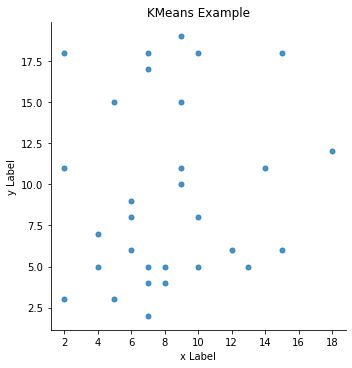

In [24]:
sb.lmplot('x', 'y', data = df, fit_reg=False, scatter_kws={'s' : 25})
plt.title('KMeans Example')
plt.xlabel('x Label')
plt.ylabel('y Label')

In [41]:
# KMeans 알고리즘을 이용해 Cluster 4개를 생성합니다.
# 별다른 설정을 하지 않으면 기본적으로 kmeans가 적용되므로 실행할 때마다 값이 변경될 수 있습니다.
# n_clusters : 군집화 할 cluster의 개수를 지정합니다.
# KMeans() 함수의 n_cluster 속성으로 군집화할 cluster의 개수를 지정하고 fit() 함수를 사용해 학습시킵니다.

points = df.values
kmeans = KMeans(n_clusters = 4).fit(points)
# KMeans() 함수 n_cluster 중심의 위치를 리턴합니다.
print('KMeans() 함수 n_cluster 중심의 위치를 리턴합니다.')
print(kmeans.cluster_centers_, end = '\n\n')
print('각각의 레코드들이 속하는 그룹을 나타냅니다.')
print(kmeans.labels_, end = '\n\n')
# df 데이터 프레임에 cluster라는 열을 추가하고 군집화된 결과를 저장하빈다.
df['cluster'] = kmeans.labels_
print(df)

KMeans() 함수 n_cluster 중심의 위치를 리턴합니다.
[[ 5.53846154  5.53846154  0.        ]
 [15.66666667 13.66666667  3.        ]
 [ 7.         17.14285714  1.        ]
 [11.14285714  7.28571429  2.        ]]

각각의 레코드들이 속하는 그룹을 나타냅니다.
[0 0 2 0 0 0 2 0 0 0 0 0 0 2 2 0 0 3 3 2 2 3 3 2 3 3 1 3 1 1]

     x   y  cluster
0    2   3        0
1    2  11        0
2    2  18        2
3    4   5        0
4    4   7        0
5    5   3        0
6    5  15        2
7    6   6        0
8    6   8        0
9    6   9        0
10   7   2        0
11   7   4        0
12   7   5        0
13   7  17        2
14   7  18        2
15   8   5        0
16   8   4        0
17   9  10        3
18   9  11        3
19   9  15        2
20   9  19        2
21  10   5        3
22  10   8        3
23  10  18        2
24  12   6        3
25  13   5        3
26  14  11        1
27  15   6        3
28  15  18        1
29  18  12        1


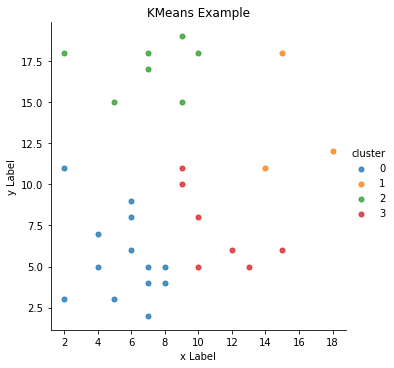

In [42]:
sb.lmplot('x', 'y', data = df, fit_reg = False, scatter_kws = {'s' : 25}, hue = 'cluster')   # scatter_kws : 점의 크기 / hue : 범례
plt.title('KMeans Example')
plt.xlabel('x Label')
plt.ylabel('y Label')
plt.show()